<a href="https://colab.research.google.com/github/tgavent/azure-libraries-for-java/blob/master/562_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Machine Learning Methods for 
# Handwritten Digit Classification

#### Trent Avent , Eliot McGinnis

# Introduction
For our project, we implemented a variety of both supervised and unsupervised machine learning methods in order to classify handwriten digits. Our data is taken from the MNIST library and includes 70000 images of handwriten numbers in the form of 28 x 28 arrays of RGB values. This data has been studied by many machine learning experts and is the subject of papers testing various algorithms. These papers have examined various linear classifiers, k-nearest neighbors with various choices of k, neural networks an other models. We seek to apply methods which we have learned in this class to the data, to find an optimal method of the classical approaches. We fit both unsupervised and supervised methods to the data, and gain insight into the nature of the models in the process. Because the data is pixelated, there is some variation in model performance- some models handle this form of data better than others. 



For preprocessing, we split the data into 60000 training instances and 10000 test cases. In order to proceed, we chose to scale the data points between zero and one by dividing all of the predictor values by 255, the previous scale.






In [0]:
import pandas as pd
import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [0]:
x_train = x_train / 255.0
x_test = x_test / 255.0
n_samples = len(x_train)
x1 = x_train.reshape((n_samples, -1))
n_samples2 = len(x_test)
x2 = x_test.reshape((n_samples2, -1))

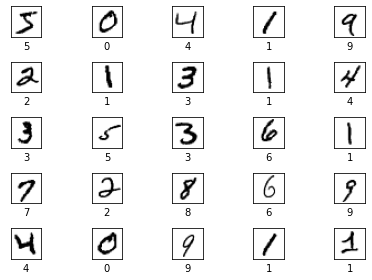

In [0]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.tight_layout()

### Principal Component Analysis

We use the unsupervised technique principal component analysis to reduce the dimension of the data for our exploratory analysis. The first two principal components contain a large part of the variation of the data, and by plotting these components and coloring by digit value, we see some relationships in the data. Principal component analysis is an excellent way to visualize our data.

In [0]:
# PCA

from sklearn.decomposition import PCA
import pandas as pd
from skimage import io, color
pca = PCA(n_components=2)
n_samples = len(x_train)
x1 = x_train.reshape((n_samples, -1))
pc = pca.fit_transform(x1)
pc = pd.concat([pd.DataFrame(pc, columns = ['pc1', 'pc2']), pd.Series(y_train, name = "y")],1)


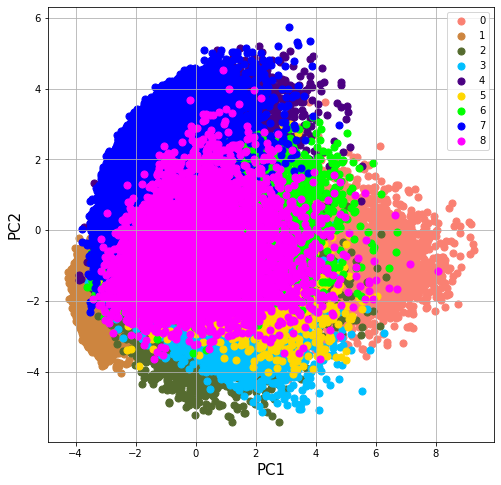

In [0]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)

y_values = [0,1,2,3,4,5,6,7,8,9]
colors = ['salmon', 'peru', 'darkolivegreen','deepskyblue',
          'indigo','gold','lime', 'blue', 'magenta']
for target, color in zip(y_values,colors):
    indicesToKeep = pc['y'] == target
    ax.scatter(pc.loc[indicesToKeep, 'pc1'], pc.loc[indicesToKeep, 'pc2'],
         c = color, s = 50)
ax.legend(y_values)
ax.grid()

Using only the first two principal components, there is no clear decision boundary. There is overlap among all of the classes, and our models will need to overcome this. This is natural- perhaps messier handwriting can lead to digits which are harder to recognize for both machine learning models and humans.

# Supervised Approaches:

### Support Vector Machines

We fit both linear and radial basis function kernel SVM to our data and examine the results. 

#### Linear Kernel SVM

We first implemented an SVM model using the sklearn library. We found the best choice of C to be 1. Below, we see the results and a matrix giving the classification rates for each class.

In [0]:
from sklearn import svm

svm_classifier = svm.SVC(kernel = "linear", C = 1) #decision_function_shape = 'ovo')
linear_svm = svm_classifier.fit(x1,y_train)


In [0]:
pred_linsvm = linear_svm.predict(x2)
print("Linear SVM test error:")
print(np.mean(pred_linsvm != y_test))
pd.crosstab(pred_linsvm, y_test, rownames = ['predicted'], colnames = ['actual'], normalize = "columns" )

Linear SVM test error:
0.0596


actual,0,1,2,3,4,5,6,7,8,9
predicted,,,,,,,,,,
0,0.976531,0.000000,0.007752,0.003960,0.001018,0.011211,0.009395,0.000973,0.008214,0.006938
1,0.000000,0.988546,0.005814,0.002970,0.001018,0.004484,0.002088,0.007782,0.004107,0.006938
2,0.004082,0.002643,0.937016,0.015842,0.010183,0.003363,0.013570,0.020428,0.006160,0.001982
3,0.001020,0.001762,0.010659,0.937624,0.001018,0.040359,0.001044,0.009728,0.025667,0.010902
4,0.001020,0.000000,0.002907,0.000990,0.959267,0.006726,0.005219,0.007782,0.007187,0.032706
5,0.006122,0.000881,0.002907,0.015842,0.002037,0.900224,0.016701,0.000973,0.026694,0.003964
6,0.009184,0.001762,0.006783,0.000000,0.004073,0.014574,0.949896,0.000000,0.006160,0.000000
7,0.001020,0.000881,0.007752,0.008911,0.002037,0.001121,0.001044,0.930934,0.007187,0.017839
8,0.000000,0.003524,0.016473,0.011881,0.003055,0.015695,0.001044,0.002918,0.900411,0.004955


This matrix shows the percentage of each predicted class that falls under each of the actual classes of digits. The diagonals of this matrix show the rate of correct classifications for the respective digits. We see that the model had the most rouble with classifying the digits 5 and 8.

In [0]:
from sklearn import svm
svm_classifier2 = svm.SVC(kernel = "rbf", C = 1, gamma = "scale")
rbf_svm = svm_classifier2.fit(x1,y_train)

In [0]:
pred_rbfsvm = rbf_svm.predict(x2)
print("RBF kernel SVM test error:")
print(np.mean(pred_rbfsvm != y_test))
pd.crosstab(pred_rbfsvm, y_test, rownames = ['predicted'], colnames = ['actual'], normalize = "columns" )

### Multiclass Logistic Regression

We use multiclass logistic regression from the sklearn library on our data. We see the results below:

In [0]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(multi_class="ovr", max_iter = 1000)
model = logit.fit(x1, y_train)

In [0]:
logit_pred = model.predict(x2)
print("Multiclass Logistic Regression Test error: ")
print(np.mean(logit_pred != y_test))
pd.crosstab(logit_pred, y_test, rownames = ['predicted'], colnames = ['actual'], normalize = "columns" )

Multiclass Logistic Regression Test error: 
0.0802


actual,0,1,2,3,4,5,6,7,8,9
predicted,,,,,,,,,,
0,0.978571,0.000000,0.008721,0.003960,0.001018,0.011211,0.009395,0.001946,0.010267,0.007929
1,0.000000,0.979736,0.007752,0.000000,0.002037,0.002242,0.003132,0.006809,0.014374,0.007929
2,0.001020,0.002643,0.891473,0.016832,0.005092,0.000000,0.007307,0.021401,0.005133,0.001982
3,0.002041,0.000881,0.019380,0.908911,0.003055,0.047085,0.002088,0.004864,0.021561,0.012884
4,0.000000,0.000000,0.008721,0.001980,0.931772,0.011211,0.006263,0.007782,0.015400,0.030723
5,0.005102,0.000881,0.003876,0.022772,0.000000,0.862108,0.020877,0.000973,0.028747,0.013875
6,0.006122,0.004405,0.009690,0.003960,0.010183,0.019058,0.946764,0.000973,0.008214,0.000000
7,0.004082,0.000881,0.010659,0.011881,0.002037,0.007848,0.001044,0.925097,0.011294,0.023786
8,0.001020,0.010573,0.035853,0.020792,0.006110,0.031390,0.003132,0.004864,0.872690,0.011893


The matrix tells us that the logistic model performs worst on digits 5 and 8. It performs overall worse than the SVM methods. 

### K-Nearest Neighbors

We fit a KNN model to our data. We found the best model to be using K=5. Note that we chose an odd K to ensure that there were no ties for classification in the data along class boundaries.  

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5 )
knn_model = knn.fit(x1,y_train)


In [0]:
pred_knn = knn_model.predict(x2)
print("KNN- test error:")
print(np.mean(pred_knn != y_test))
pd.crosstab(pred_knn, y_test, rownames = ['predicted'], colnames = ['actual'], normalize = "columns")

### Unsupervised Approaches: Other Methods


#### K-Means Clustering
We fitted a KMeans model with 10 clusters to the training data. We received poor results as seen in the table. There were no distinct trends apparent, so there was issues properly labelling the clusters. This is similar to the uncertain results that we found by plotting the data on the principal components. We must consider that k-means uses a distance function that may not be appropriate for working with pixel data.

In [0]:
# K means with 10 clusters
from sklearn.cluster import KMeans
X = x_train.reshape(len(x_train),-1)
Y = y_train
km = KMeans(init='k-means++',n_clusters=10).fit(X)

In [0]:
kmpred = km.predict(x_test.reshape(len(x_test),-1))
pd.crosstab(kmpred, y_test, rownames = ['cluster'], colnames = ['actual'])

actual,0,1,2,3,4,5,6,7,8,9
cluster,,,,,,,,,,
0,48,2,65,696,0,287,2,0,209,7
1,2,1,709,40,5,4,18,13,6,3
2,5,469,84,7,36,105,30,57,43,11
3,0,660,59,73,30,23,28,59,34,29
4,447,0,3,1,1,9,20,1,6,4
5,423,0,19,18,1,38,24,1,11,10
6,3,0,30,15,559,56,22,292,34,541
7,19,1,27,146,5,281,19,1,586,13
8,30,2,25,7,35,19,794,1,10,4


### Neural Network
Finally, we tried a neural network with 2 hidden layers with 128 and 10 nodes each. The neural net is fit over 10 epochs in order to further increase the accuracy.

In [0]:
# Two layer neural net with 128 and 10 nodes
from tensorflow import keras

neuralnet = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128),
    keras.layers.Dense(10)
])

In [9]:
neuralnet.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
neuralnet.fit(x_train, y_train, epochs = 10)
test_loss, test_acc = neuralnet.evaluate(x_test, y_test, verbose = 2)

print('\nTest accuracy:', test_acc)
probability_model = tf.keras.Sequential([neuralnet, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3589 - accuracy: 0.8971
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2986 - accuracy: 0.9167
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2870 - accuracy: 0.9195
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2803 - accuracy: 0.9217
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2759 - accuracy: 0.9232
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2740 - accuracy: 0.9233
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2708 - accuracy: 0.9247
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2685 - accuracy: 0.9246
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2659 - accuracy: 0.9258
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.264

In [10]:
nn_pred = np.arange(len(x_test))
for i in range(len(x_test)):
  pred_label = np.argmax(predictions[i])
  nn_pred[i] = pred_label
#nn_df = pd.DataFrame([nn_pred,y_test])
pd.crosstab(nn_pred, y_test, rownames = ['cluster'], colnames = ['actual'], normalize = "columns")

actual,0,1,2,3,4,5,6,7,8,9
cluster,,,,,,,,,,
0,0.948980,0.000000,0.002907,0.000990,0.001018,0.005605,0.005219,0.000000,0.003080,0.003964
1,0.000000,0.977974,0.007752,0.000000,0.002037,0.004484,0.003132,0.007782,0.006160,0.007929
2,0.002041,0.002643,0.859496,0.007921,0.002037,0.002242,0.003132,0.016537,0.003080,0.000991
3,0.005102,0.001762,0.031977,0.937624,0.003055,0.059417,0.002088,0.007782,0.028747,0.012884
4,0.002041,0.000881,0.011628,0.005941,0.927699,0.015695,0.007307,0.007782,0.013347,0.021804
5,0.012245,0.000881,0.002907,0.010891,0.000000,0.829596,0.007307,0.000973,0.019507,0.004955
6,0.020408,0.003524,0.017442,0.002970,0.014257,0.028027,0.968685,0.000000,0.017454,0.000000
7,0.005102,0.001762,0.015504,0.010891,0.004073,0.011211,0.002088,0.924125,0.011294,0.020813
8,0.003061,0.010573,0.041667,0.016832,0.007128,0.033632,0.001044,0.002918,0.883984,0.005946


The final test accuracy of the model is quite good, and the diagonal of the table shows the percentage of properly classified samples for each digit.

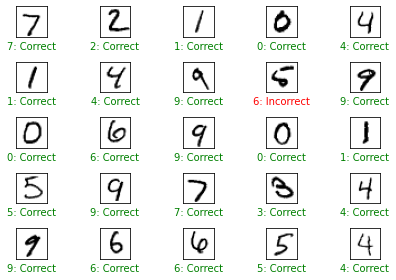

In [0]:
for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    if predicted_label == y_test[i]:
        color = 'green'
        label = ": Correct"
    else:
        color = 'red'
        label = ": Incorrect"
    ax.set_xlabel(str(predicted_label) + label, color=color)
plt.tight_layout()

# Results
Overall the neural network was the highest performing unsupervized model.  Perhaps the model can be improved by testing different combinations and sizes of layers.

For the supervised methods, we found that ...